In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("black_friday_train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df1=df.head(1000)

In [6]:
df1.shape

(1000, 12)

In [7]:
df_test=pd.read_csv("black_friday_test.csv")

In [8]:
df_test.shape

(233599, 11)

In [9]:
df2=df_test.head(1000)

In [10]:
df2.shape

(1000, 11)

In [11]:
data=df.append(df_test)    # merging test and train data

C:\Users\lvsha\AppData\Local\Temp\ipykernel_12256\1917619604.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df.append(df_test)    # merging test and train data


In [12]:
data.shape

(783667, 12)

In [13]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
data.describe()     # basic statics of data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
#Droppping unneccesory fields
data.drop(['User_ID'],axis=1,inplace=True)

In [16]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [21]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [22]:
#converting Categorical data into numerical using map function
data['Gender']=data['Gender'].map({'F':0,'M':1})

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 80.

In [26]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [27]:
data['Age']=data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [29]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
city=pd.get_dummies(data['City_Category'],drop_first=True)

In [35]:
data=pd.concat([data,city],axis=1)

In [36]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [38]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [39]:
data.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [40]:
data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [41]:
data.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [42]:
data.Product_Category_1.mode()

0    5
Name: Product_Category_1, dtype: int64

In [43]:
#Renaming the cols
data.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'},inplace=True)

In [45]:
data['cat2']=data['cat2'].fillna(data['cat2'].mode()[0])

In [47]:
data.cat2.mode()

0    8.0
Name: cat2, dtype: float64

In [77]:
data['cat3']=data['cat3'].fillna(data['cat3'].mode()[0])
data['Purchase']=data['Purchase'].fillna(data['Purchase'].mean())

In [78]:
data.cat3.mode()

0    16.0
Name: cat3, dtype: float64

In [ ]:
data.drop(columns='City_Category',inplace=True)

In [53]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [64]:
data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [68]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\lvsha\AppData\Local\Temp\ipykernel_12256\1369221623.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+','')


In [72]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)
data['B']=data['B'].astype(int)
data['C']=data['C'].astype(int)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 84.9+ MB


In [81]:
#Droping unneccessory field
data2=data.copy()

In [82]:
data2.drop('Product_ID',axis=1,inplace=True)

In [83]:
data2.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [84]:
data2.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

C:\Users\lvsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

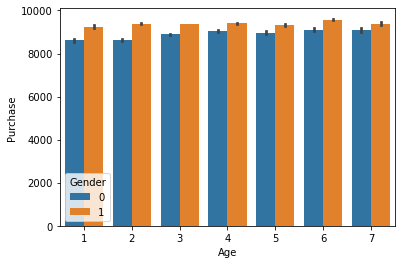

In [91]:
#Graph b/w Age and Purchase
sns.barplot('Age','Purchase',hue='Gender',data=data2)

C:\Users\lvsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

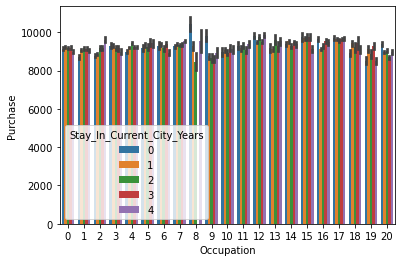

In [92]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=data2)

C:\Users\lvsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat1', ylabel='Purchase'>

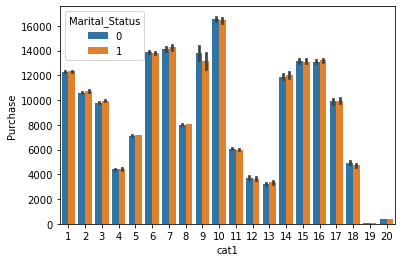

In [93]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=data2)

C:\Users\lvsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat2', ylabel='Purchase'>

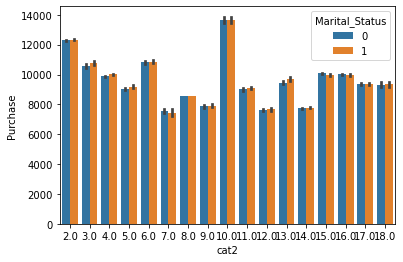

In [94]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=data2)

C:\Users\lvsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat3', ylabel='Purchase'>

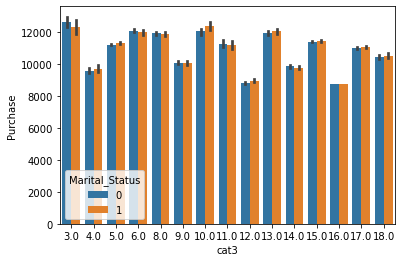

In [95]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=data2)

In [99]:
X=data2.drop('Purchase',axis=1)
y=data2.Purchase

In [102]:
X.shape

(783667, 10)

In [103]:
y.shape

(783667,)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [106]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(258611,)

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [108]:
X_train

array([[-1.74785225, -1.10530202, -0.62577026, ...,  0.36919014,
        -0.85244908,  1.48933627],
       [-1.74785225, -1.84362214,  0.2946075 , ...,  0.36919014,
        -0.85244908, -0.67144004],
       [ 0.57213074,  1.10965835,  1.82857045, ...,  0.36919014,
         1.1730906 , -0.67144004],
       ...,
       [ 0.57213074,  0.37133822,  0.90819268, ..., -3.6389387 ,
        -0.85244908,  1.48933627],
       [ 0.57213074,  1.84797847, -1.23935544, ...,  0.36919014,
         1.1730906 , -0.67144004],
       [ 0.57213074,  0.37133822, -0.16558138, ...,  0.36919014,
         1.1730906 , -0.67144004]])

In [109]:
X_test

array([[-1.74785225,  2.58629859,  0.75479639, ...,  0.36919014,
        -0.85244908,  1.48933627],
       [ 0.57213074, -0.3669819 ,  1.36838156, ..., -0.7239359 ,
         1.1730906 , -0.67144004],
       [ 0.57213074,  0.37133822,  1.36838156, ...,  0.36919014,
         1.1730906 , -0.67144004],
       ...,
       [ 0.57213074, -0.3669819 , -0.62577026, ...,  0.36919014,
        -0.85244908, -0.67144004],
       [ 0.57213074,  0.37133822, -0.77916656, ...,  0.36919014,
        -0.85244908, -0.67144004],
       [-1.74785225, -1.10530202,  1.82857045, ...,  0.36919014,
         1.1730906 , -0.67144004]])